# <span style="color:green"> Numerical Simulation Laboratory: Numerical Exercises 3 </span>

## Exercise 03.1
### <span style="color:royalblue"> Comment on the C++ code - Usage </span>
The C++ program can be compiled by means of a makefile, which produces the executable **main.exe**. One could also compile and launch directly using the command **make all** or clean the existing output and .o files using **make clean**.<br>
Once the program finishes the computations, the elapsed time is shown.
### <span style="color:royalblue"> Comment on the C++ code - Structure </span>
The C++ code is based on the classes **Stat** (stat.h), which contains the principal statistical methods (for instance, the blocking method, with progressive and block averages) and **Brownian** (together with its derived class **GBM**, contained in the file brownian.h). The class Brownian implements the main features of the Brownian motion, with the possibility to set the $\sigma=t$ elapsed between each step. Instead, GBM extends the previous class by introducing the method **Evolve(dt, steps)**, which applies $steps$ times the discretized relation

$$S(t_{i+1}) = S(t_i) \exp\left[ \left(\mu-\frac{1}{2}\sigma^2\right)(t_{i+1}-t_i)
    +\sigma Z_{i+1}\sqrt{t_{i+1}-t_i}\right]$$
### <span style="color:royalblue"> Comment on the Python code </span>
We define here some functions which read the four files _call_direct.out, call_discrete.out, put_direct.out_ and _put_discrete.out_ produced by the C++ program and plot the progressive averages (with the corresponding errors).

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

def Read(filename):
    mean = []
    sigma = []
    with open(filename) as file:
        M = int(file.readline().split()[1])
        N = int(file.readline().split()[1])
        for line in file:
            mean.append(float(line.split()[0]))
            sigma.append(float(line.split()[1]))
    return M, N, mean, sigma

def Plot(M, N, C_dir_mean, C_dir_sigma, C_dis_mean, C_dis_sigma, P_dir_mean, P_dir_sigma, P_dis_mean, P_dis_sigma):
    fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(13, 10))
    fig.suptitle(f"European call-option and put-option prices, r = 0.1, $\sigma$ = 0.25, {M} samples, "+
                 f"{N} blocks", y = 1.01, fontsize=16)

    # Call-option, direct evaluation
    ax[0][0].errorbar(np.arange(1, N+1), C_dir_mean, yerr=C_dir_sigma, color='black', ecolor='darkorange',\
                      label=f'Last C(T=1) = {C_dir_mean[N-1]:.4f} $\pm$ {C_dir_sigma[N-1]:.4f}')
    ax[0][0].set_xlabel(f"Blocks [1:{N}]")
    ax[0][0].set_ylabel("C(T = 1)")
    ax[0][0].set_title(f"European call-option price C(T = 1), direct evaluation")

    # Call-option, discretized
    ax[0][1].errorbar(np.arange(0, N), C_dis_mean, C_dis_sigma, color='black', ecolor='darkorange', \
                      label=f'Last C(T=1) = {C_dis_mean[N-1]:.4f} $\pm$ {C_dis_sigma[N-1]:.4f}')
    ax[0][1].set_xlabel(f"Blocks [1:{N}]")
    ax[0][1].set_ylabel("C(T = 1)")
    ax[0][1].set_title(f"European call-option price C(T = 1), discretized evaluation")

    # Put-option, direct evaluation
    ax[1][0].errorbar(np.arange(0, N), P_dir_mean, P_dir_sigma, color='black', ecolor='darkorange', \
                      label=f'Last P(T=1) = {P_dir_mean[N-1]:.4f} $\pm$ {P_dir_sigma[N-1]:.4f}')
    ax[1][0].set_xlabel(f"Blocks [1:{N}]")
    ax[1][0].set_ylabel("P(T = 1)")
    ax[1][0].set_title(f"European put-option price P(T = 1), direct evaluation")

    # Put-option, discretized
    ax[1][1].errorbar(np.arange(0, N), P_dis_mean, P_dis_sigma, color='black', ecolor='darkorange', \
                      label=f'Last P(T=1) = {P_dis_mean[N-1]:.4f} $\pm$ {P_dis_sigma[N-1]:.4f}')
    ax[1][1].set_xlabel(f"Blocks [1:{N}]")
    ax[1][1].set_ylabel("P(T = 1)")
    ax[1][1].set_title(f"European put-option price P(T = 1), discretized evaluation")

    ax = ax.flatten()
    for i in range(0, 4):
        ax[i].grid(True)
        if (i>=2):
            ax[i].legend(prop={'size': 15}, loc='lower right')
        else:
            ax[i].legend(prop={'size': 15}, loc='upper right')
    matplotlib.rcParams['lines.color'] = 'red'
    fig.tight_layout(pad=2.7) 

Then we plot the progressive average of the final asset price $S(T)$ of each configuration, computed at time $T = 1$, as a function of the blocks in which the data are partitioned. The sample size and the number of blocks are specified in the title. We see that the direct evaluation is in good agreement with the discretized counterpart for both the call-option and put-option prices.

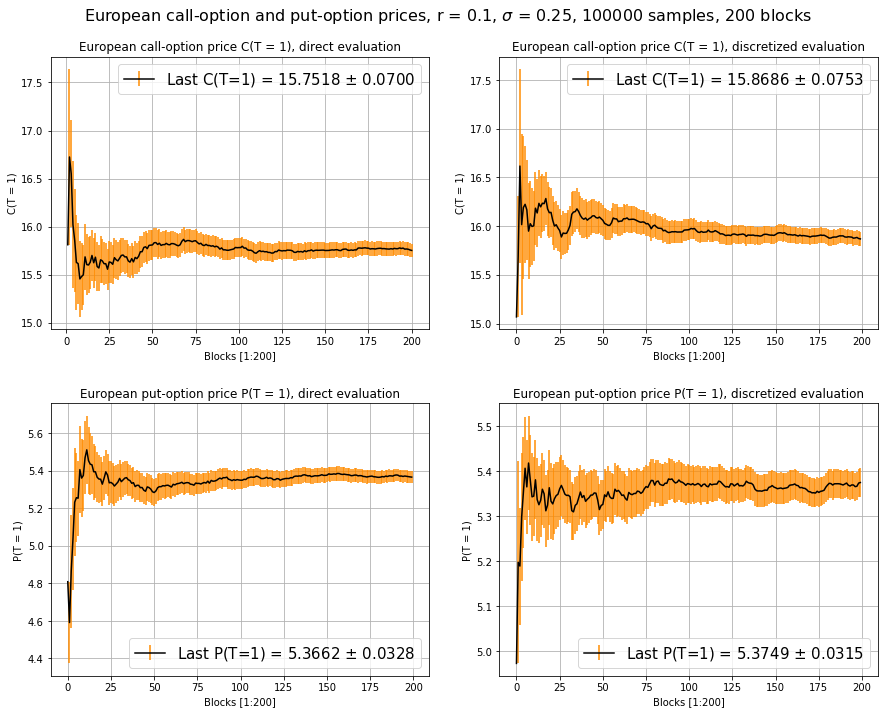

In [2]:
# Read the progressive mean and sigma of Call-option price (C), Put-option price (P), both discretized and direct
M, N, C_dir_mean, C_dir_sigma = Read("./Esercizio03.1/call_direct.out")
_, _, C_dis_mean, C_dis_sigma = Read("./Esercizio03.1/call_discrete.out")
_, _, P_dir_mean, P_dir_sigma = Read("./Esercizio03.1/put_direct.out")
_, _, P_dis_mean, P_dis_sigma = Read("./Esercizio03.1/put_discrete.out")

Plot(M, N, C_dir_mean, C_dir_sigma, C_dis_mean, C_dis_sigma, P_dir_mean, P_dir_sigma, P_dis_mean, P_dis_sigma)

plt.show()